Imports

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

Reading csv

In [13]:
df = pd.read_csv('universal_top_spotify_songs.csv')
pd.set_option('display.max_columns', None)
df.head(25)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,1,0,0,NaN,2023-12-12,98,False,241106,Merry Christmas,1994-10-28,0.336,0.627,7,-7.463,1,0.0384,0.16400,0.000000,0.0708,0.350,150.273,4
1,06qMRF18gwbOYYbnP2du6i,Last Christmas - Single Version,Wham!,2,0,0,NaN,2023-12-12,87,False,265960,The Singles: Echoes from the Edge of Heaven,2023-07-07,0.733,0.598,2,-8.228,1,0.0278,0.21200,0.000004,0.1560,0.935,107.732,4
2,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,Brenda Lee,3,0,0,NaN,2023-12-12,96,False,126266,Merry Christmas From Brenda Lee,1964-10-19,0.589,0.472,8,-8.749,1,0.0502,0.61400,0.000000,0.5050,0.898,67.196,4
3,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,Bobby Helms,4,0,0,NaN,2023-12-12,92,False,130973,Jingle Bell Rock/Captain Santa Claus (And His ...,1957-12-02,0.754,0.424,2,-8.463,1,0.0363,0.64300,0.000000,0.0652,0.806,119.705,4
4,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,5,0,4,NaN,2023-12-12,100,True,131872,greedy,2023-09-15,0.750,0.733,6,-3.180,0,0.0319,0.25600,0.000000,0.1140,0.844,111.018,1
5,1rv46mRwDqMEhOBZ7vODg3,It's Beginning to Look a Lot like Christmas,Michael Bublé,6,0,0,NaN,2023-12-12,85,False,207199,Christmas (Deluxe Special Edition),2011-10-14,0.331,0.223,4,-11.274,1,0.0338,0.88000,0.000006,0.3430,0.355,92.896,3
6,0lizgQ7Qw35od7CYaoMBZb,Santa Tell Me,Ariana Grande,7,0,-2,NaN,2023-12-12,95,False,204093,Santa Tell Me,2014-11-24,0.525,0.621,7,-7.364,1,0.1160,0.04890,0.000000,0.2940,0.591,191.900,4
7,1IcR6RlgvDczfvoWJSSY2A,It's the Most Wonderful Time of the Year,Andy Williams,8,0,0,NaN,2023-12-12,78,False,151000,The Andy Williams Christmas Album,1963-01-01,0.234,0.526,2,-11.656,1,0.0411,0.87100,0.000002,0.1220,0.649,201.739,3
8,2uFaJJtFpPDc5Pa95XzTvg,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,9,0,-2,NaN,2023-12-12,94,False,117146,A Winter Romance,1959-01-01,0.451,0.240,1,-14.014,1,0.0351,0.91200,0.000002,0.1750,0.701,134.009,4
9,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,10,3,0,NaN,2023-12-12,98,False,137773,The Land Is Inhospitable and So Are We,2023-09-15,0.504,0.308,9,-14.958,1,0.0321,0.86800,0.135000,0.1580,0.121,113.950,4


Shape

In [14]:
df.shape

(203933, 25)

Feature categorization

In [15]:
numeric_feats = ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity', 'duration_ms', 'danceability',
                 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


categorical_feats = ['country', 'is_explicit',
                     'key', 'mode', 'time_signature']

other_feats = ['spotify_id', 'name', 'artist',
               'snapshot_date', 'album_name', 'album_release_date']

Predicted feature properties

In [16]:
df['popularity'].describe()

count    203933.000000
mean         77.556114
std          16.333047
min           0.000000
25%          66.000000
50%          82.000000
75%          90.000000
max         100.000000
Name: popularity, dtype: float64

In [17]:
df['popularity'].median()

82.0

Missing values check

In [18]:
missing_values = df.isna().sum()
print(missing_values)

spotify_id               0
name                    22
artists                 22
daily_rank               0
daily_movement           0
weekly_movement          0
country               2756
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name              68
album_release_date      68
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64


Missing values - percentage

In [19]:
percentage_missing = (missing_values / len(df)) * 100
print(percentage_missing)

spotify_id            0.000000
name                  0.010788
artists               0.010788
daily_rank            0.000000
daily_movement        0.000000
weekly_movement       0.000000
country               1.351424
snapshot_date         0.000000
popularity            0.000000
is_explicit           0.000000
duration_ms           0.000000
album_name            0.033344
album_release_date    0.033344
danceability          0.000000
energy                0.000000
key                   0.000000
loudness              0.000000
mode                  0.000000
speechiness           0.000000
acousticness          0.000000
instrumentalness      0.000000
liveness              0.000000
valence               0.000000
tempo                 0.000000
time_signature        0.000000
dtype: float64


Full analysis

In [20]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000,203933.000000
mean,25.473258,0.936209,4.278155,77.556114,194173.705722,0.682666,0.641474,5.389775,-6.685044,0.519220,0.101847,0.294582,0.017656,0.173740,0.537964,122.106994,3.899487
std,14.424902,7.216657,13.736657,16.333047,49285.320330,0.141516,0.164306,3.463476,2.712452,0.499632,0.096326,0.261124,0.091903,0.126279,0.229446,28.497938,0.440370
min,1.000000,-49.000000,-46.000000,0.000000,0.000000,0.158000,0.012400,0.000000,-31.042000,0.000000,0.023000,0.000008,0.000000,0.015400,0.027100,46.718000,1.000000
25%,13.000000,-1.000000,-3.000000,66.000000,162637.000000,0.587000,0.537000,2.000000,-8.188000,0.000000,0.039100,0.085600,0.000000,0.097300,0.362000,99.958000,4.000000
50%,25.000000,0.000000,0.000000,82.000000,187742.000000,0.705000,0.659000,6.000000,-6.276000,1.000000,0.059800,0.203000,0.000001,0.120000,0.533000,119.935000,4.000000
75%,38.000000,2.000000,7.000000,90.000000,220116.000000,0.794000,0.758000,8.000000,-4.863000,1.000000,0.122000,0.469000,0.000082,0.218000,0.726000,140.282000,4.000000
max,50.000000,49.000000,49.000000,100.000000,759080.000000,0.982000,0.997000,11.000000,1.155000,1.000000,0.912000,0.996000,0.970000,0.968000,0.989000,217.969000,5.000000


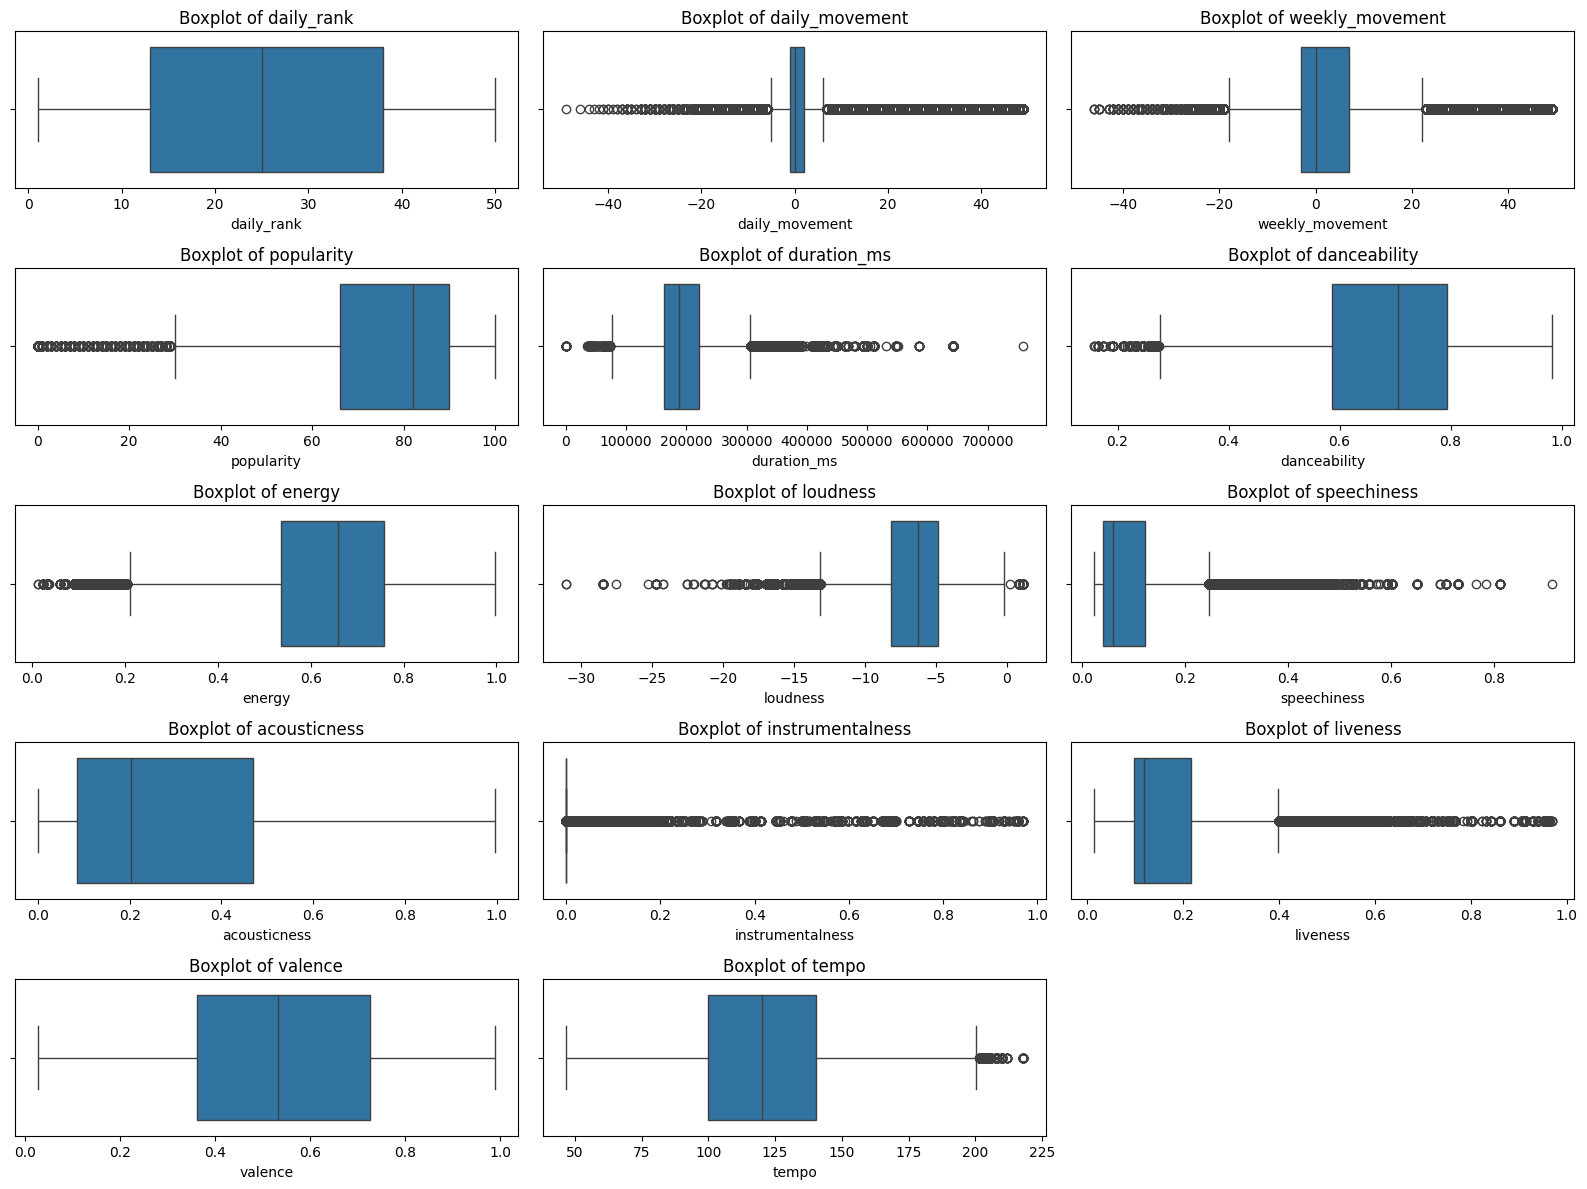

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("universal_top_spotify_songs.csv")

# List of numerical features
numeric_feats = ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity', 'duration_ms', 'danceability',
                 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Set the size of the plot
plt.figure(figsize=(16, 12))

# Create separate boxplots for each numerical feature
for i, feature in enumerate(numeric_feats, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


Skewness/Curtosis

In [22]:
# Specify the variable you want to analyze (e.g., 'popularity')
variable_to_analyze = 'popularity'

# Extract the values of the variable
data = df[variable_to_analyze]

# Calculate skewness and kurtosis
skewness = skew(data)
kurt = kurtosis(data)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: -1.3518573174410702
Kurtosis: 3.1497972843184403
